In [1]:
import os
import pandas as pd

In [2]:
df_monday= pd.read_csv('monday.csv',sep=';', header=0, parse_dates=True)
df_tuesday= pd.read_csv('tuesday.csv',sep=';', header=0, parse_dates=True)
df_wednesday= pd.read_csv('wednesday.csv',sep=';', header=0, parse_dates=True)
df_thursday= pd.read_csv('thursday.csv',sep=';', header=0, parse_dates=True)
df_friday= pd.read_csv('friday.csv',sep=';', header=0, parse_dates=True)

In [3]:
def add_day(df,day):
    df["day"]= day
    df["timestamp"]=pd.to_datetime(df['timestamp'])

In [4]:
add_day(df_monday,'monday')
add_day(df_tuesday, 'tuesday')
add_day(df_wednesday, 'wednesday')
add_day(df_thursday, 'thursday')
add_day(df_friday, 'friday')

In [5]:
def add_customer_no(df,suffix):
    df["customer_no_day"]=(df["customer_no"]).astype(str) + str(suffix)

In [6]:
add_customer_no(df_monday, 'm')
add_customer_no(df_tuesday,'tu')
add_customer_no(df_wednesday,'w')
add_customer_no(df_thursday,'th')
add_customer_no(df_friday,'f')

In [7]:
pdList = [df_monday, df_tuesday, df_wednesday,df_thursday,df_friday]  # List of your dataframes
combo = pd.concat(pdList)

In [9]:
df_week=combo.copy()
df_week

,timestamp,customer_no,location,day,customer_no_day
0,2019-09-02 07:03:00,1,dairy,monday,1m
1,2019-09-02 07:03:00,2,dairy,monday,2m
2,2019-09-02 07:04:00,3,dairy,monday,3m
3,2019-09-02 07:04:00,4,dairy,monday,4m
4,2019-09-02 07:04:00,5,spices,monday,5m
...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday,1500f
5121,2019-09-06 21:50:00,1507,checkout,friday,1507f
5122,2019-09-06 21:50:00,1508,checkout,friday,1508f
5123,2019-09-06 21:50:00,1509,drinks,friday,1509f


In [13]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        24877 non-null  datetime64[ns]
 1   customer_no      24877 non-null  int64         
 2   location         24877 non-null  object        
 3   day              24877 non-null  object        
 4   customer_no_day  24877 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [14]:
#Calculate the total number of customers in each section
print(df_week['location'].unique())
print(df_week.groupby('location')['customer_no_day'].unique())
print(df_week.groupby('location')['customer_no_day'].count())

['dairy' 'spices' 'fruit' 'checkout' 'drinks']
location
checkout    , 5m, 2m, 3m, 8m, 4m, 10m, 11m, 14m, 12m, 1...
dairy       , 2m, 3m, 4m, 6m, 9m, 13m, 16m, 18m, 22m, 2...
drinks      , 11m, 12m, 20m, 19m, 21m, 24m, 28m, 29m, 3...
fruit       , 10m, 14m, 15m, 7m, 17m, 9m, 18m, 22m, 23m...
spices      , 6m, 7m, 12m, 15m, 16m, 19m, 13m, 21m, 25m...
Name: customer_no_day, dtype: object
location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no_day, dtype: int64


In [15]:
#Calculate the total number of customers in each section over time
df_week.groupby(['timestamp','location'])['customer_no_day'].count()

timestamp            location
2019-09-02 07:03:00  dairy       2
2019-09-02 07:04:00  dairy       2
                     fruit       1
                     spices      3
2019-09-02 07:05:00  checkout    2
                                ..
2019-09-06 21:50:00  checkout    2
                     dairy       1
                     drinks      1
                     fruit       1
                     spices      1
Name: customer_no_day, Length: 13839, dtype: int64

In [16]:
#Display the number of customers at checkout over time
df_week.loc[df_week["location"] == "checkout"].groupby('timestamp')['customer_no_day'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-06 21:37:00    1
2019-09-06 21:45:00    1
2019-09-06 21:47:00    2
2019-09-06 21:48:00    2
2019-09-06 21:50:00    2
Name: customer_no_day, Length: 3460, dtype: int64

In [18]:
#Calculate the time each customer spent in the market
date_min = df_monday.groupby('customer_no')['timestamp'].agg(['min'])
date_max = df_monday.groupby('customer_no')['timestamp'].agg(['max'])
date_min['min'] = pd.to_datetime(date_min['min'])
date_max['max'] = pd.to_datetime(date_max['max'])
print(date_max.head())
print(date_min.head())
df_monday['time_spent']=date_max['max']-date_min['min']
# date_max hat keine Kolumne max
df_monday.groupby(['customer_no'])['time_spent'].sum()

                            max
customer_no                    
1           2019-09-02 07:05:00
2           2019-09-02 07:06:00
3           2019-09-02 07:06:00
4           2019-09-02 07:08:00
5           2019-09-02 07:05:00
                            min
customer_no                    
1           2019-09-02 07:03:00
2           2019-09-02 07:03:00
3           2019-09-02 07:04:00
4           2019-09-02 07:04:00
5           2019-09-02 07:04:00


customer_no
1      00:03:00
2      00:06:00
3      00:13:00
4      00:08:00
5      00:11:00
         ...   
1443   00:00:00
1444   00:00:00
1445   00:00:00
1446   00:00:00
1447   00:00:00
Name: time_spent, Length: 1447, dtype: timedelta64[ns]

In [19]:
#Calculate the total number of customers present in the supermarket over time.
df_week.groupby(['timestamp'])['customer_no'].count()

timestamp
2019-09-02 07:03:00    2
2019-09-02 07:04:00    6
2019-09-02 07:05:00    4
2019-09-02 07:06:00    8
2019-09-02 07:07:00    4
                      ..
2019-09-06 21:46:00    5
2019-09-06 21:47:00    4
2019-09-06 21:48:00    7
2019-09-06 21:49:00    4
2019-09-06 21:50:00    6
Name: customer_no, Length: 4363, dtype: int64

In [24]:
#Our business managers think that the first section customers visit follows a different pattern 
#than the following ones. Plot the distribution of customers of their first visited section 
#versus following sections 
#(treat all sections visited after the first as “following”)

date_min= df_monday.groupby(['customer_no','location'])['timestamp'].agg(['min'])
date_min['min'] = pd.to_datetime(date_min['min'])
df_monday['first_section']=df_monday.groupby(['customer_no','timestamp'])['location'].transform('min')
df_monday['time_spent_min']=df_monday['time_spent'].astype('timedelta64[m]')
df_monday

,timestamp,customer_no,location,day,customer_no_day,time_spent,first_section,time_spent_min
0,2019-09-02 07:03:00,1,dairy,monday,1m,NaT,dairy,NaN
1,2019-09-02 07:03:00,2,dairy,monday,2m,00:02:00,dairy,2.0
2,2019-09-02 07:04:00,3,dairy,monday,3m,00:03:00,dairy,3.0
3,2019-09-02 07:04:00,4,dairy,monday,4m,00:02:00,dairy,2.0
4,2019-09-02 07:04:00,5,spices,monday,5m,00:04:00,spices,4.0
...,...,...,...,...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,monday,1442m,NaT,checkout,NaN
4880,2019-09-02 21:49:00,1444,checkout,monday,1444m,NaT,checkout,NaN
4881,2019-09-02 21:49:00,1445,dairy,monday,1445m,NaT,dairy,NaN
4882,2019-09-02 21:50:00,1446,dairy,monday,1446m,NaT,dairy,NaN


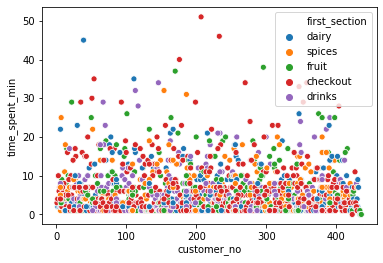

In [25]:
import seaborn as sns
sns.scatterplot(x='customer_no',y='time_spent_min',data=df_monday, hue='first_section')

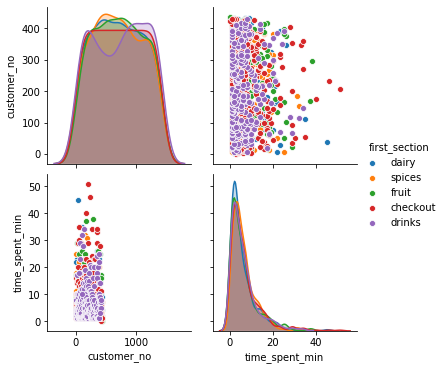

In [26]:
sns.pairplot(df_monday, hue="first_section")

In [32]:
df_hist=df_monday.groupby(['customer_no','first_section'])['time_spent_min'].agg(['sum'])

In [37]:
df_hist.reset_index(inplace=True)
df_hist

,index,customer_no,first_section,sum
0,0,1,checkout,3.0
1,1,1,dairy,0.0
2,2,2,checkout,4.0
3,3,2,dairy,2.0
4,4,3,checkout,10.0
...,...,...,...,...
4224,4224,1444,checkout,0.0
4225,4225,1444,spices,0.0
4226,4226,1445,dairy,0.0
4227,4227,1446,dairy,0.0


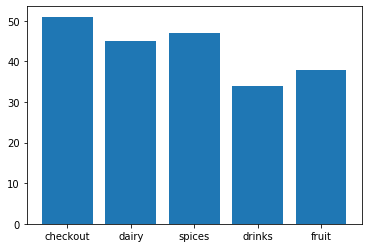

In [39]:
import matplotlib.pyplot as plt
plt.bar(df_hist['first_section'], df_hist['sum'])
#rects2 = ax.bar(df_hist['first_section'], df_hist['time_spent_min'])
plt.show()

### Markov Simulation

In [40]:
combo

,timestamp,customer_no,location,day,customer_no_day
0,2019-09-02 07:03:00,1,dairy,monday,1m
1,2019-09-02 07:03:00,2,dairy,monday,2m
2,2019-09-02 07:04:00,3,dairy,monday,3m
3,2019-09-02 07:04:00,4,dairy,monday,4m
4,2019-09-02 07:04:00,5,spices,monday,5m
...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday,1500f
5121,2019-09-06 21:50:00,1507,checkout,friday,1507f
5122,2019-09-06 21:50:00,1508,checkout,friday,1508f
5123,2019-09-06 21:50:00,1509,drinks,friday,1509f


In [41]:
combo['first_section']=combo.groupby(['customer_no','timestamp'])['location'].transform('min')

In [42]:
combo

,timestamp,customer_no,location,day,customer_no_day,first_section
0,2019-09-02 07:03:00,1,dairy,monday,1m,dairy
1,2019-09-02 07:03:00,2,dairy,monday,2m,dairy
2,2019-09-02 07:04:00,3,dairy,monday,3m,dairy
3,2019-09-02 07:04:00,4,dairy,monday,4m,dairy
4,2019-09-02 07:04:00,5,spices,monday,5m,spices
...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday,1500f,dairy
5121,2019-09-06 21:50:00,1507,checkout,friday,1507f,checkout
5122,2019-09-06 21:50:00,1508,checkout,friday,1508f,checkout
5123,2019-09-06 21:50:00,1509,drinks,friday,1509f,drinks


In [43]:
date_min= combo.groupby(['customer_no_day','location'])['timestamp'].agg(['min'])
date_max= combo.groupby(['customer_no_day','location'])['timestamp'].agg(['max'])

df_min=pd.DataFrame(date_min)
df_max=pd.DataFrame(date_max)
df_min['min'] = pd.to_datetime(date_min['min'])
df_max['max'] = pd.to_datetime(date_max['max'])

In [44]:
dfm=date_max.join(date_min)
dfm.reset_index(inplace=True)
dfm

,customer_no_day,location,max,min
0,1000f,checkout,2019-09-06 17:20:00,2019-09-06 17:20:00
1,1000f,fruit,2019-09-06 17:19:00,2019-09-06 17:19:00
2,1000m,checkout,2019-09-02 17:51:00,2019-09-02 17:51:00
3,1000m,dairy,2019-09-02 17:44:00,2019-09-02 17:44:00
4,1000m,drinks,2019-09-02 17:50:00,2019-09-02 17:50:00
...,...,...,...,...
21666,9tu,checkout,2019-09-03 07:30:00,2019-09-03 07:30:00
21667,9tu,dairy,2019-09-03 07:23:00,2019-09-03 07:13:00
21668,9tu,fruit,2019-09-03 07:21:00,2019-09-03 07:10:00
21669,9w,checkout,2019-09-04 07:04:00,2019-09-04 07:04:00


In [45]:
dfm['customer_no_day']=dfm['customer_no_day'].astype(str)
combo['customer_no_day']=combo['customer_no_day'].astype(str)

In [46]:
combo.groupby(['first_section'])['location'].count()
combo.groupby(['customer_no_day','timestamp'])['location'].transform('min')

0          dairy
1          dairy
2          dairy
3          dairy
4         spices
          ...   
5120       dairy
5121    checkout
5122    checkout
5123      drinks
5124      spices
Name: location, Length: 24877, dtype: object

In [47]:
combo['next_loc']=combo['location'].shift(-1) 

In [48]:
combo_shift=combo.copy()
combo_shift.set_index('customer_no_day', inplace=True)
combo_shift.head()

,timestamp,customer_no,location,day,first_section,next_loc
customer_no_day,,,,,,
1m,2019-09-02 07:03:00,1,dairy,monday,dairy,dairy
2m,2019-09-02 07:03:00,2,dairy,monday,dairy,dairy
3m,2019-09-02 07:04:00,3,dairy,monday,dairy,dairy
4m,2019-09-02 07:04:00,4,dairy,monday,dairy,spices
5m,2019-09-02 07:04:00,5,spices,monday,spices,spices


In [49]:
combo.groupby(['customer_no_day','location'])['next_loc'].count()

customer_no_day  location
1000f            checkout    1
                 fruit       1
1000m            checkout    1
                 dairy       1
                 drinks      1
                            ..
9tu              checkout    1
                 dairy       2
                 fruit       2
9w               checkout    1
                 spices      1
Name: next_loc, Length: 21671, dtype: int64

In [50]:
combo.loc[combo["location"] == "fruit"].groupby(['customer_no_day','location','next_loc'])['next_loc'].count()

customer_no_day  location  next_loc
1000f            fruit     fruit       1
1000tu           fruit     fruit       1
1001f            fruit     dairy       2
1001m            fruit     drinks      1
1001th           fruit     fruit       2
                                      ..
9f               fruit     fruit       1
9m               fruit     checkout    1
9th              fruit     spices      1
9tu              fruit     dairy       1
                           fruit       1
Name: next_loc, Length: 4933, dtype: int64

In [51]:
#Transitionmatrix
result=combo.groupby(['location','next_loc'])['customer_no_day'].count()
result=result.unstack('next_loc').values
result

array([[2688, 1242, 1168, 1267, 1052],
       [1223,  946,  736, 1046,  728],
       [1139,  731,  630,  805,  600],
       [1296, 1056,  789, 1176,  805],
       [1071,  703,  582,  828,  569]], dtype=int64)

In [52]:
#transition probability matrix
result_cross=pd.crosstab(combo['location'],combo['next_loc'], normalize=0)
result_cross

next_loc,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.362411,0.167453,0.157476,0.170824,0.141836
dairy,0.261381,0.202180,0.157299,0.223552,0.155589
drinks,0.291677,0.187196,0.161332,0.206146,0.153649
fruit,0.253026,0.206169,0.154041,0.229598,0.157165
spices,0.285372,0.187317,0.155076,0.220624,0.151612


In [53]:
# Random Initial State Vector
import numpy as np
isv_plain=np.zeros(4,dtype=int)
isv_plain
n=np.random.randint(0,4,1)
isv=np.insert(isv_plain,n,1)
isv

array([0, 0, 0, 1, 0])

In [54]:
# one markov transformation
np.matmul(isv,result_cross.values)

array([0.25302616, 0.20616947, 0.15404139, 0.22959781, 0.15716517])

In [57]:
def simulation(TransitionMatrix,TransitionCount):
    '''function for markov simulation, one customer only
    transitioncounts flexible'''
    sim=[]
    isv_plain=np.zeros(4,dtype=int)
    n=np.random.randint(0,4,1)
    isv=np.insert(isv_plain,n,1)
    sv_insert=np.matmul(isv,TransitionMatrix.values)
    sim.append(sv_insert)
    for i in range(TransitionCount):
        sv_insert=np.matmul(sv_insert,TransitionMatrix.values)
        sim.append(sv_insert)

    return sim

In [56]:
simulation(result_cross,10)

[array([0.25302616, 0.20616947, 0.15404139, 0.22959781, 0.15716517]),
 array([0.29346322, 0.18966501, 0.15686758, 0.20845699, 0.1515472 ]),
 array([0.29767604, 0.18821758, 0.1569675 , 0.20616426, 0.15097463]),
 array([0.2981101 , 0.18806914, 0.15697739, 0.2059282 , 0.15091516]),
 array([0.2981548 , 0.18805386, 0.15697841, 0.20590389, 0.15090904]),
 array([0.29815941, 0.18805229, 0.15697851, 0.20590138, 0.1509084 ]),
 array([0.29815988, 0.18805213, 0.15697852, 0.20590113, 0.15090834]),
 array([0.29815993, 0.18805211, 0.15697853, 0.2059011 , 0.15090833]),
 array([0.29815993, 0.18805211, 0.15697853, 0.2059011 , 0.15090833]),
 array([0.29815993, 0.18805211, 0.15697853, 0.2059011 , 0.15090833]),
 array([0.29815993, 0.18805211, 0.15697853, 0.2059011 , 0.15090833])]

In [58]:
def simulation_c(CustomerCount):
    '''simulation for flexible customercount'''
    c=[]
    for i in range(CustomerCount):
        sim_c=simulation(result_cross,5)
        c.append(sim_c)
    return c

In [59]:
c=simulation_c(50)

In [60]:
c[3]

[array([0.25302616, 0.20616947, 0.15404139, 0.22959781, 0.15716517]),
 array([0.29346322, 0.18966501, 0.15686758, 0.20845699, 0.1515472 ]),
 array([0.29767604, 0.18821758, 0.1569675 , 0.20616426, 0.15097463]),
 array([0.2981101 , 0.18806914, 0.15697739, 0.2059282 , 0.15091516]),
 array([0.2981548 , 0.18805386, 0.15697841, 0.20590389, 0.15090904]),
 array([0.29815941, 0.18805229, 0.15697851, 0.20590138, 0.1509084 ])]

In [61]:
# weighted random choice for next status
from numpy.random import choice
draw = choice(['checkout','dairy','drinks','fruit','spices'], 1,p=c[1][1])
draw

array(['drinks'], dtype='<U8')

In [62]:
def simulation_one_cu():
    '''Markov Simulation for one customer and 5 transitions
    ending with checkout'''
    sim_dev_cu=[]
    for j in range(5):
        draws = choice(['checkout','dairy','drinks','fruit','spices'], 1,p=c[0][j])
        if draws!='checkout':
            sim_dev_cu.append(draws)
        elif draws=='checkout':
            sim_dev_cu.append(draws)
            break
    return sim_dev_cu

In [63]:
simulation_one_cu()

[array(['drinks'], dtype='<U8'),
 array(['drinks'], dtype='<U8'),
 array(['drinks'], dtype='<U8'),
 array(['checkout'], dtype='<U8')]

In [64]:
def simulation_dev(CustomerCount,TransitionCount):
    '''Complete Markov Simulation with flexible customercount 
    and flexible transitioncount'''
    sim_dev_total=[]
    for i in range(CustomerCount):
        sim_dev=[]
        for j in range(TransitionCount):
            draws = choice(['checkout','dairy','drinks','fruit','spices'], 1,p=c[i][j])
            if draws!='checkout':
                sim_dev.append(draws)
                continue
            elif draws=='checkout':
                sim_dev.append(draws)
                break
        sim_dev_total.append(sim_dev)
        print(sim_dev_total)
    return sim_dev_total

In [65]:
simu_dev_total=simulation_dev(50,5)

[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')]]
[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')]]
[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8')]]
[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['fruit']

[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['drinks'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['fruit'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['che

[[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['drinks'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['fruit'], dtype='<U8'), array(['spices'], dtype='<U8'), array(['fruit'], dtype='<U8'), array(['dairy'], dtype='<U8'), array(['spices'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['spices'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['fruit'], dtype='<U8'), array(['checkout'], dtype='<U8')], [array(['checkout'], dtype='<U8')], [array(['drinks'], dtype='<U8'), array(['che

In [66]:
#sim_dev_total is a list of lists, with index you can read every simulated customer
simu_dev_total[11]

[array(['drinks'], dtype='<U8'), array(['checkout'], dtype='<U8')]

In [ ]:
#visuals to go